In [1]:
import pandas as pd 
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "png" # needed to make the plotly.express show on github
from internproject.constants import ROOT_DATA_DIR

In [2]:
frxETH_ETH_apr_df = pd.read_csv(
    ROOT_DATA_DIR
    / 'daily_snapshots/0xa1F8A6807c402E4A15ef4EBa36528A3FED24E577_apr_df.csv',
    index_col=0,
    parse_dates=True,
)

frxETH_ETH_apr_df

,lp_token_total_supply,lp_token_virtual_price,pool_balance_0,pool_balance_1,block,pool_balance_market_0,pool_balance_market_1,market_eth_tvl,pool_balance_market_portion_0,pool_balance_market_portion_1,...,pool_balance_equilibrium_portion_0,pool_balance_equilibrium_portion_1,lp_token_equilibrium_eth_value,lp_token_discount_percent,raw_base_apr,raw_fee_apr,raw_incentive_apr,raw_price_apr,tokens,pool_address
timestamp,,,,,,,,,,,,,,,,,,,,,
2022-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['0xEeeeeEeeeEeEeeEeEeEeeEEEeeeeEeeeeeeeEEeE',...",0xa1F8A6807c402E4A15ef4EBa36528A3FED24E577
2022-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['0xEeeeeEeeeEeEeeEeEeEeeEEEeeeeEeeeeeeeEEeE',...",0xa1F8A6807c402E4A15ef4EBa36528A3FED24E577
2022-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['0xEeeeeEeeeEeEeeEeEeEeeEEEeeeeEeeeeeeeEEeE',...",0xa1F8A6807c402E4A15ef4EBa36528A3FED24E577
2022-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['0xEeeeeEeeeEeEeeEeEeEeeEEEeeeeEeeeeeeeEEeE',...",0xa1F8A6807c402E4A15ef4EBa36528A3FED24E577
2022-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['0xEeeeeEeeeEeEeeEeEeEeeEEEeeeeEeeeeeeeEEeE',...",0xa1F8A6807c402E4A15ef4EBa36528A3FED24E577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-27,88270.286189,1.000996,31382.604727,56978.999351,17346692.0,31382.604727,56954.207385,88336.812111,0.355261,0.644739,...,0.355161,0.644839,1.001035,-0.028057,0.0,0.075183,3.545422,0.028057,"['0xEeeeeEeeeEeEeeEeEeEeeEEEeeeeEeeeeeeeEEeE',...",0xa1F8A6807c402E4A15ef4EBa36528A3FED24E577
2023-05-28,88159.356858,1.000998,31292.982054,56957.736222,17353818.0,31292.982054,56911.827176,88204.809230,0.354776,0.645224,...,0.354592,0.645408,1.001036,-0.052021,0.0,0.053493,3.430841,0.052021,"['0xEeeeeEeeeEeEeeEeEeEeeEEEeeeeEeeeeeeeEEeE',...",0xa1F8A6807c402E4A15ef4EBa36528A3FED24E577
2023-05-29,88187.930634,1.000998,31365.341997,56913.957483,17360948.0,31365.341997,56869.429002,88234.771000,0.355476,0.644524,...,0.355297,0.644703,1.001036,-0.050440,0.0,0.005645,3.423793,0.050440,"['0xEeeeeEeeeEeEeeEeEeEeeEEEeeeeEeeeeeeeEEeE',...",0xa1F8A6807c402E4A15ef4EBa36528A3FED24E577


In [3]:
frxETH_ETH_apr_df.columns

Index(['lp_token_total_supply', 'lp_token_virtual_price', 'pool_balance_0',
       'pool_balance_1', 'block', 'pool_balance_market_0',
       'pool_balance_market_1', 'market_eth_tvl',
       'pool_balance_market_portion_0', 'pool_balance_market_portion_1',
       'lp_token_market_eth_value', 'pool_balance_equilibrium_0',
       'pool_balance_equilibrium_1', 'equilibrium_eth_tvl',
       'pool_balance_equilibrium_portion_0',
       'pool_balance_equilibrium_portion_1', 'lp_token_equilibrium_eth_value',
       'lp_token_discount_percent', 'raw_base_apr', 'raw_fee_apr',
       'raw_incentive_apr', 'raw_price_apr', 'tokens', 'pool_address'],
      dtype='object')

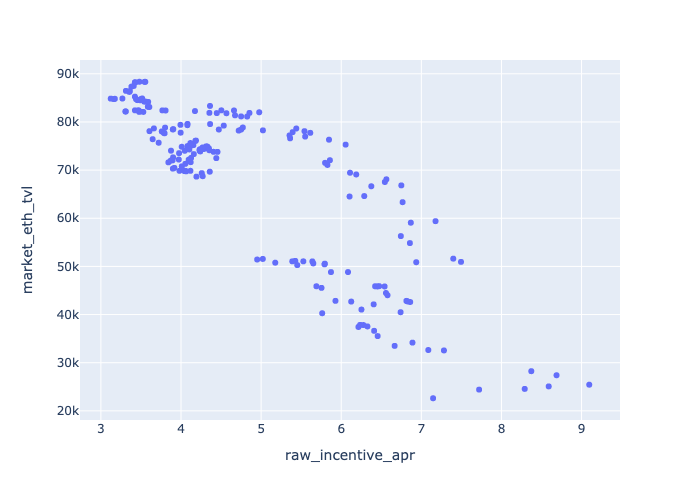

In [4]:
px.scatter(frxETH_ETH_apr_df, x='raw_incentive_apr', y='market_eth_tvl')

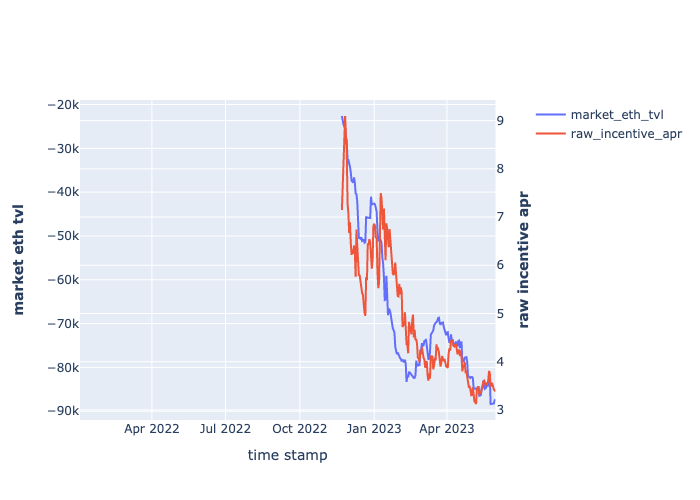

In [5]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=frxETH_ETH_apr_df.index, y=-frxETH_ETH_apr_df['market_eth_tvl'], name='market_eth_tvl'), 
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=frxETH_ETH_apr_df.index, y=frxETH_ETH_apr_df['raw_incentive_apr'], name='raw_incentive_apr'), 
    secondary_y=True,
)

# Set x-axis title
fig.update_xaxes(title_text="time stamp")

# Set y-axes titles
fig.update_yaxes(title_text="<b>market eth tvl</b>", secondary_y=False)
fig.update_yaxes(title_text="<b>raw incentive apr</b>", secondary_y=True)

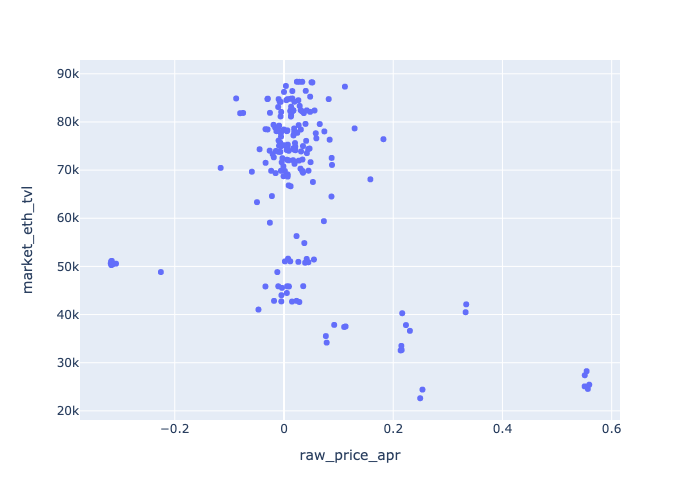

In [6]:
px.scatter(frxETH_ETH_apr_df, x='raw_price_apr', y='market_eth_tvl')

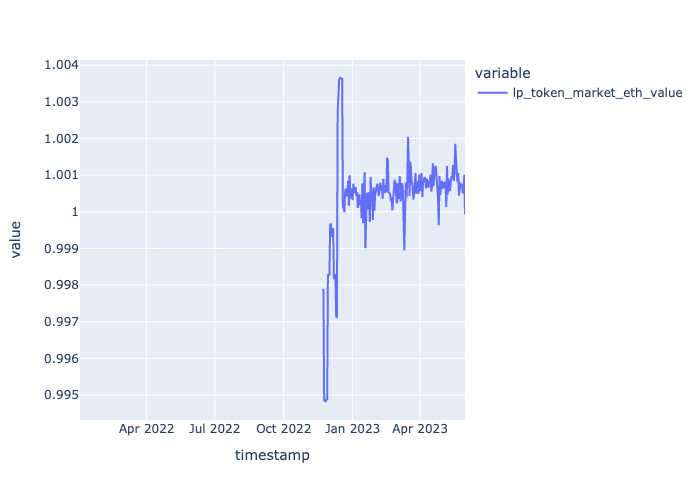

In [7]:
px.line(frxETH_ETH_apr_df['lp_token_market_eth_value'])